# Generating samples for the Benjamin F. Maier Facebook friends network and PCA analysis

In this section, the functions from the ``samnet`` module are used to obtain samples from a real network: Benjamin F. Maier Facebook friends network. This network is cited in the following article: https://doi.org/10.1103/PhysRevE.96.042307. As in the other analyses performed in this project, metrics for these samples and the original sampled network are calculated. Then, a Principal Components Analysis is performed for dimension reduction of the calculated metrics and 2d and 3d graphics are plotted so we can see the distance between the topology of the samples and the original network.

In [2]:
from samnet import *

The following function is used to obtain a dataframe that includes the PCA principal components that explain the largest share of the variability from the metrics data. It receives the dataframe containing the metrics obtained from the original network and from the samples, the number of principal components to return, and the columns that should not be used for the PCA. It returns the original dataframe containing the original metrics and the principal components scores.

In [3]:
def pca_table_processing(df: pd.DataFrame, components:int=3, last_columns_discount:int=3)->pd.DataFrame:
    
    df = df.copy()
    
    col_names = df.drop(['method', 'net id', 'len'],axis=1).columns

    from sklearn.preprocessing import MinMaxScaler
    mm_scaler = MinMaxScaler()
    df_mm = mm_scaler.fit_transform(df.drop(['method', 'net id', 'len'], axis = 1))

    df_mm = pd.DataFrame(df_mm, columns=col_names)

    df_mm['method'] = data['method'].copy()
    df_mm['net id'] = data['net id'].copy()
    df_mm['len'] = data['len'].copy()
    
    
    pca = PCA(n_components=components)

    X = np.matrix(df_mm.iloc[:,0:df_mm.shape[1]-last_columns_discount])
    pca.fit(X)

    print(np.round(pca.explained_variance_ratio_,6))
    
    for i in range(components):
        pca_column = pca.transform(X)[:,i]
        column_name = 'Component'+str(i)
        df[column_name] = pca_column
    
    return df

In [4]:
maier = nx.read_gml('data/bfmaier_anonymized_fb_network.gml')
largest_cc = max(nx.connected_components(maier), key=len)
maier = maier.subgraph(largest_cc).copy()
len(maier)

329

For this analysis, we get the largest component of the network and remove a set of random nodes until the network is a connected network of 300 vertices. This will enable comparisons between this analysis and the ones performed on random models, as 300 vertices is the standard adopted in this study. Its structure is presented in the image bellow.

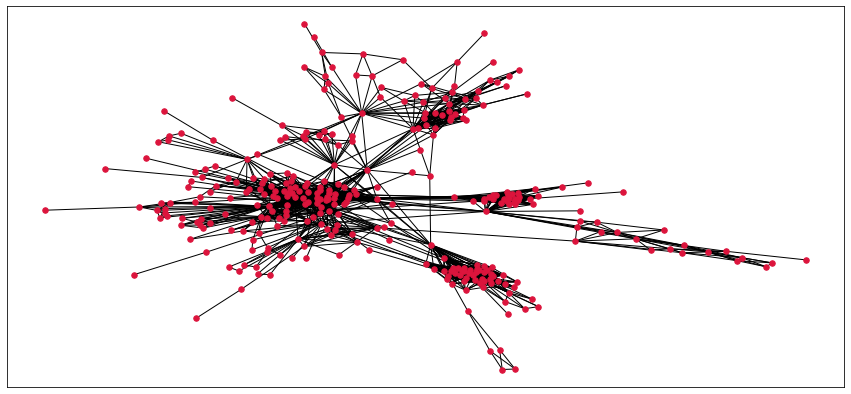

In [5]:
visualize(maier, save = 0)

In [6]:
sample=list(pd.Series(np.array(maier.nodes)).sample(29, random_state=76).values)

In [7]:
maier.remove_nodes_from(sample)

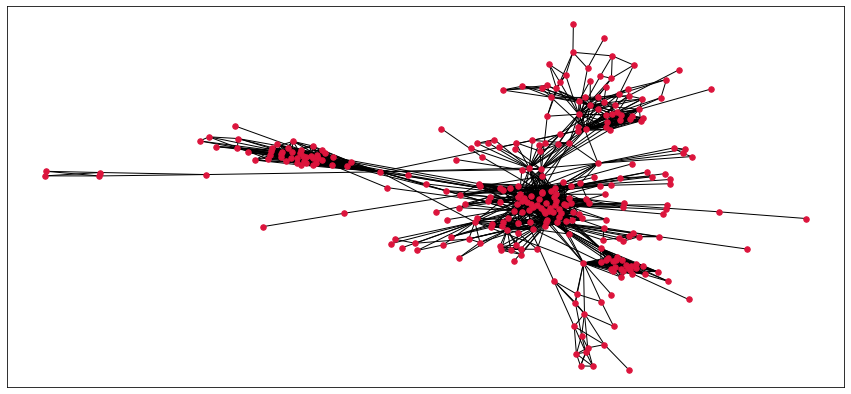

In [8]:
visualize(maier, seed=909)

In [9]:
len(maier) # now the meier network has the same node count as the other generated examples

300

In [10]:
nx.is_connected(maier)

True

The ``total_gen`` function receives the original gtraphs list, a list containing the vetex proportions of the sample in comparison with the original network, and the number of samples to be obtained of each kind. For this analysis, samples with 10%, 25% and 40% of the number of original vertices are obtained using each of the 5 samlping methods (IRSW, RSW, MHRW, TR and SB). The number of samples by kind is 2500, hence, for each combination of sampling method and network size, 2500 samples are generated.

In [11]:
data = total_gen([maier], [0.1, 0.25, 0.4], 2500)

Completeness:   0.0
Completeness:   0.0
Completeness:   0.0
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.001
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.002
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.003
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.004
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.005
Completeness:   0.006
Completeness:   0.006
Completeness:   0.006
Completeness:   0.006
Completeness:   

In [12]:
data.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,4m PageRank,H PageRank,1m Eigenvector,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id
0,0.073060,0.499621,3.583835,20.128174,11.026667,221.946667,6228.646667,218183.506667,1.397156,0.588479,...,1.181305e-09,0.00000,0.031162,0.003333,0.000533,0.000100,0.146031,300,Original,0
1,-1.000000,0.000000,1.933333,15.000000,1.933333,29.000000,813.933333,23577.000000,0.063470,0.000000,...,1.520769e-03,0.06347,0.150500,0.033333,0.013973,0.008621,0.063470,30,SB,0
2,-0.087034,0.088235,4.232184,2.888889,2.400000,6.933333,24.200000,99.333333,0.445561,0.113333,...,2.668166e-06,0.00000,0.134582,0.033333,0.011193,0.004493,0.526808,30,RWS,0
3,-0.206332,0.664311,2.328736,8.718182,7.333333,63.933333,619.333333,6476.733333,1.057943,0.718026,...,2.484769e-06,0.00000,0.138170,0.033333,0.009521,0.002858,0.470899,30,IRWS,0
4,-0.079918,0.050847,4.133333,2.903226,2.066667,6.000000,22.666667,100.800000,0.593298,0.018889,...,4.497946e-06,0.00000,0.134206,0.033333,0.011512,0.004724,0.512705,30,TR,0


In [13]:
data.shape

(37501, 47)

In [14]:
data[data['method']=='SB'].shape

(7500, 47)

In [15]:
data.to_csv('data/meier_robust_example.csv', index=False)

The PCA is obtained and the explained variance of the 3 first principal components are displayed by the function ``pca_processing_table``. PC0 explains 48% of the variability, PC1 29% and PC2 8% (the function scales the metrics to avoid metric scale impact). Hence, more than 80% of the variability is explained by the most important 3 components. The data is displayed bellow.

In [16]:
df = pca_table_processing(df=data)

[0.477551 0.294793 0.079599]


In [17]:
df.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id,Component0,Component1,Component2
0,0.073060,0.499621,3.583835,20.128174,11.026667,221.946667,6228.646667,218183.506667,1.397156,0.588479,...,0.003333,0.000533,0.000100,0.146031,300,Original,0,1.714434,-0.543899,0.057200
1,-1.000000,0.000000,1.933333,15.000000,1.933333,29.000000,813.933333,23577.000000,0.063470,0.000000,...,0.033333,0.013973,0.008621,0.063470,30,SB,0,-1.364388,0.941345,1.708513
2,-0.087034,0.088235,4.232184,2.888889,2.400000,6.933333,24.200000,99.333333,0.445561,0.113333,...,0.033333,0.011193,0.004493,0.526808,30,RWS,0,-1.096790,0.661683,-0.202872
3,-0.206332,0.664311,2.328736,8.718182,7.333333,63.933333,619.333333,6476.733333,1.057943,0.718026,...,0.033333,0.009521,0.002858,0.470899,30,IRWS,0,0.515466,1.202690,-0.229821
4,-0.079918,0.050847,4.133333,2.903226,2.066667,6.000000,22.666667,100.800000,0.593298,0.018889,...,0.033333,0.011512,0.004724,0.512705,30,TR,0,-1.223442,0.597781,-0.211205


In [18]:
df.to_csv('data/pca_meier_robust_example.csv', index=False)

## 2d Graphics to compare samples using principal components

In [19]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

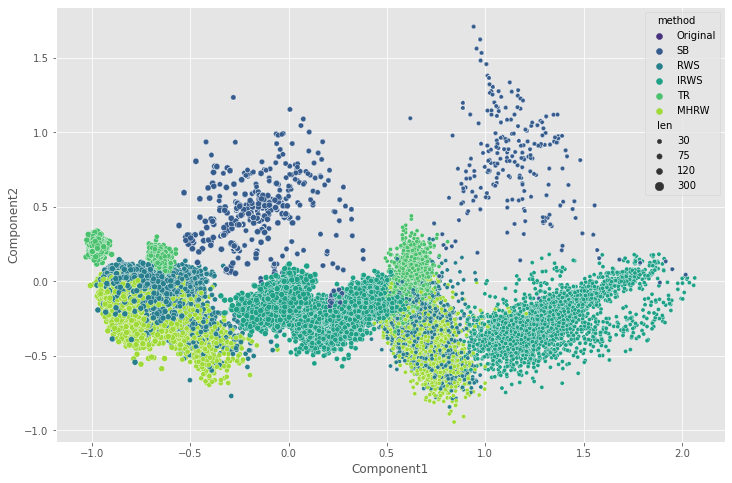

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Component1", y="Component2", size = 'len', hue = "method", palette = "viridis")

## 3d Graphics to compare samples using the 3 components that explain more variance in the data

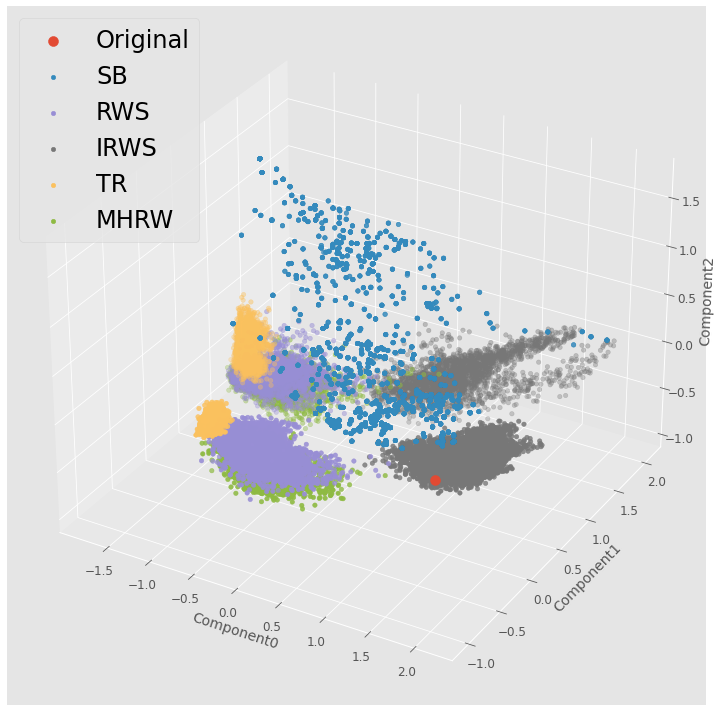

In [23]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component1']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component0', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component2', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

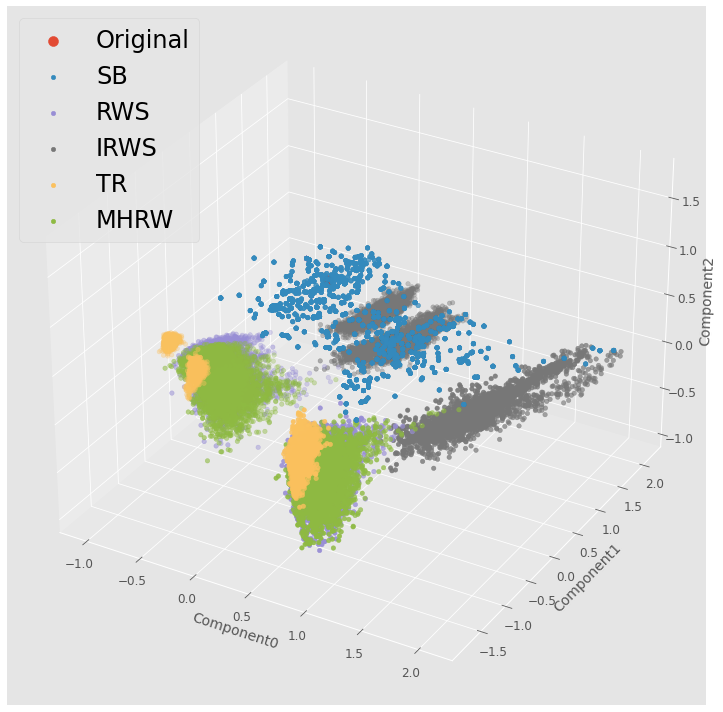

In [24]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component1']
ys = df['Component0']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component0', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component2', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

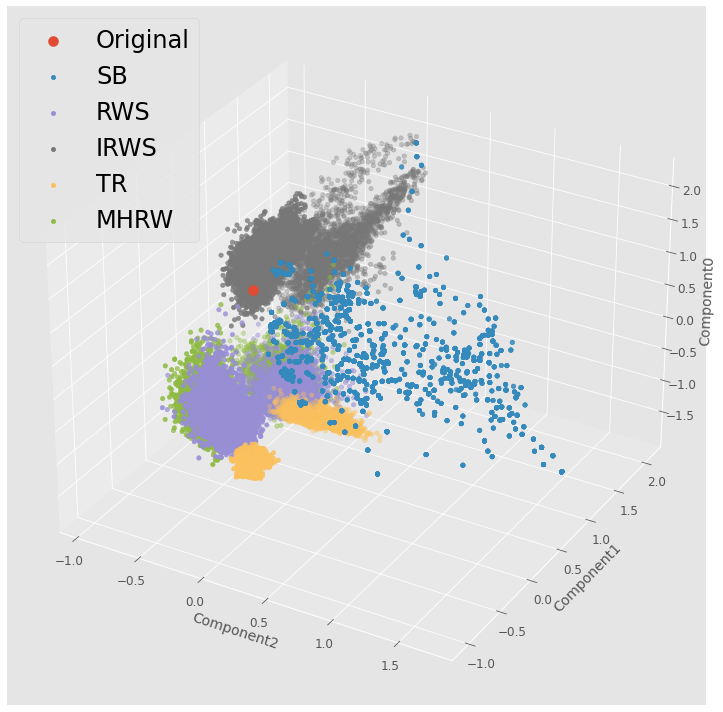

In [25]:
m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 12) 
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component2']
ys = df['Component1']
zs = df['Component0']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 24, loc = 'upper left')

ax.set_xlabel('Component2', fontsize = 14);
ax.set_ylabel('Component1', fontsize = 14);
ax.set_zlabel('Component0', fontsize = 14);

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()